# Analysis of Bloomfield via City of Pittsburgh Facilities
### By Erik Lehmann
## Introduction
This analysis with give an overveiw of City of Pittsburgh facilities, primarily focusing on Bloomfield. The presence of city facilities can offer easy access to city services to a neighborhood, as well as offering amenities to its citizens. Viewing the distrobution of city faciltiies can also serve to highlight the neighborhoods that may require further investment by the city, and can aid in compairing different neighborhoods to eachother. This analysis will use this dataset: https://data.wprdc.org/dataset/city-of-pittsburgh-facilities published by the City of Pittsburgh, and contains up to date information on every City of Pittsburgh facility.

To begin, lets look at a graph that contains every neighborhood ranked by the number of city facilities.

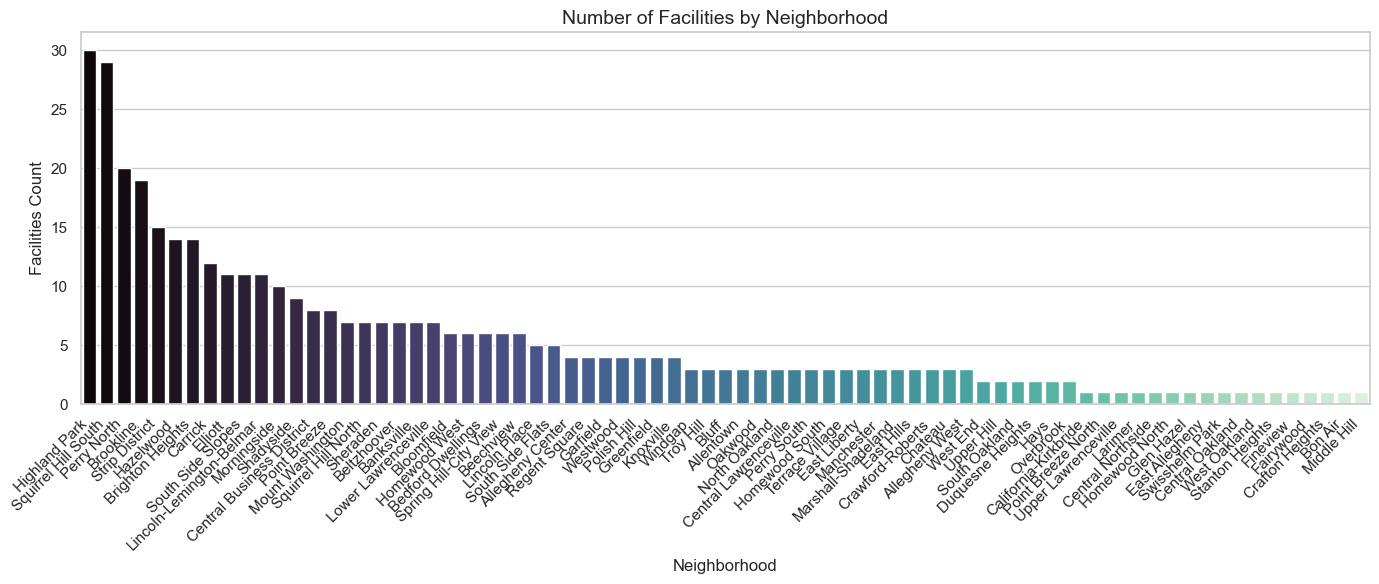

In [66]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('cf.csv')

# Count facilities by neighborhood
facilities = data['neighborhood'].value_counts().reset_index()
facilities.columns = ['neighborhood', 'count']

# Set plot theme
sb.set_theme(style="whitegrid")

# Create bar plot
plt.figure(figsize=(14, 6))
sb.barplot(
    data=facilities,
    x='neighborhood',
    y='count',
    hue='neighborhood',
    palette="mako",
    legend=False
)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.title('Number of Facilities by Neighborhood', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Facilities Count', fontsize=12)

# Display plot
plt.tight_layout()
plt.show()




That graph seems a little cluttered, although it allows us to see that the number of facilities is heavily weighted towards neighborhoods such as Highland Park and Squirrel Hill South, a smaller dataset might give more clairty. This next graph only contains neighborhoods with at least 3 city facilities, and highlights Bloomfield among them. I'll also print out the Median and Mean of all neighborhoods in the city in order to get a better comparison point.

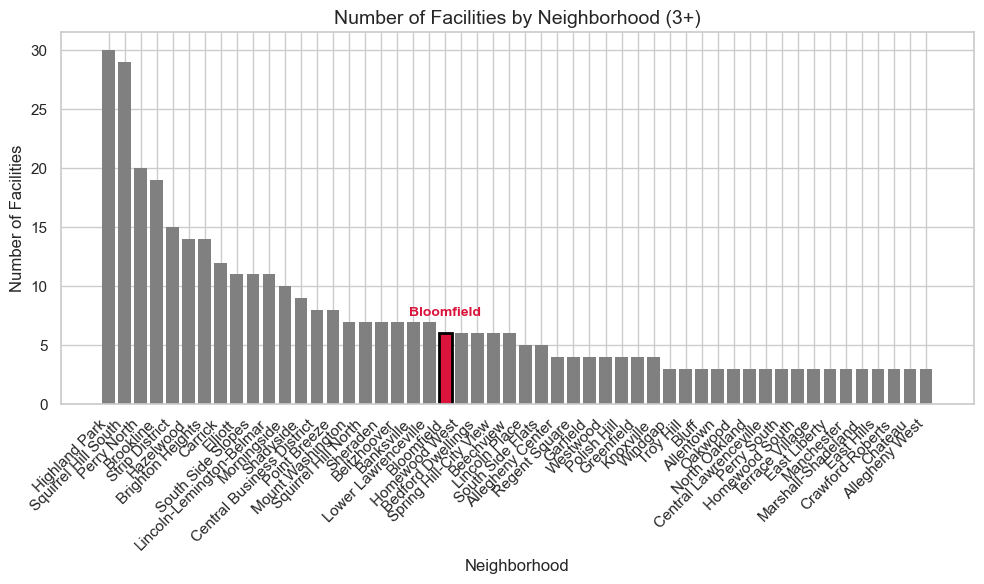

In [70]:

# Count facilities by neighborhood
f = data['neighborhood'].value_counts().reset_index()
f.columns = ['neighborhood', 'count']

# Filter neighborhoods with 3+ facilities
bl = f[f['count'] >= 3].copy()

# Color Bloomfield red, others gray
bl['color'] = bl['neighborhood'].apply(
    lambda x: 'crimson' if x == 'Bloomfield' else 'gray'
)

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(
    x=bl['neighborhood'],
    height=bl['count'],
    color=bl['color'],
    edgecolor=['black' if n == 'Bloomfield' else 'none' for n in bl['neighborhood']],
    linewidth=2
)

# Label Bloomfield above its bar
for bar, neighborhood in zip(bars, bl['neighborhood']):
    if neighborhood == 'Bloomfield':
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1.5,
            'Bloomfield',
            ha='center',
            fontsize=10,
            color='crimson',
            fontweight='bold'
        )

# Add title and labels
plt.title('Number of Facilities by Neighborhood (3+)', fontsize=14)
plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Number of Facilities', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()




In [65]:

# Defines columns
f = data['neighborhood'].value_counts().reset_index()
f.columns = ['Neighborhoods', 'Facilities']  

# Sort neighborhoods by the number of facilities
f = f.sort_values(by='Facilities', ascending=False)

# Calculate the median and mean number of facilities
median = f['Facilities'].median()
mean = f['Facilities'].mean()

# Prints median,mean, and table
print(f"Median: {median}")
print(f"Mean: {mean:.2f}\n")
print(f)





Median: 3.0
Mean: 5.48

           Neighborhoods  Facilities
0          Highland Park          30
1    Squirrel Hill South          29
2            Perry North          20
3              Brookline          19
4         Strip District          15
..                   ...         ...
62     Central Northside           1
61               Larimer           1
60   Upper Lawrenceville           1
58  California-Kirkbride           1
74           Middle Hill           1

[75 rows x 2 columns]


#### Now, with a median and mean to compare to, lets look at the city facilties in Bloomfield

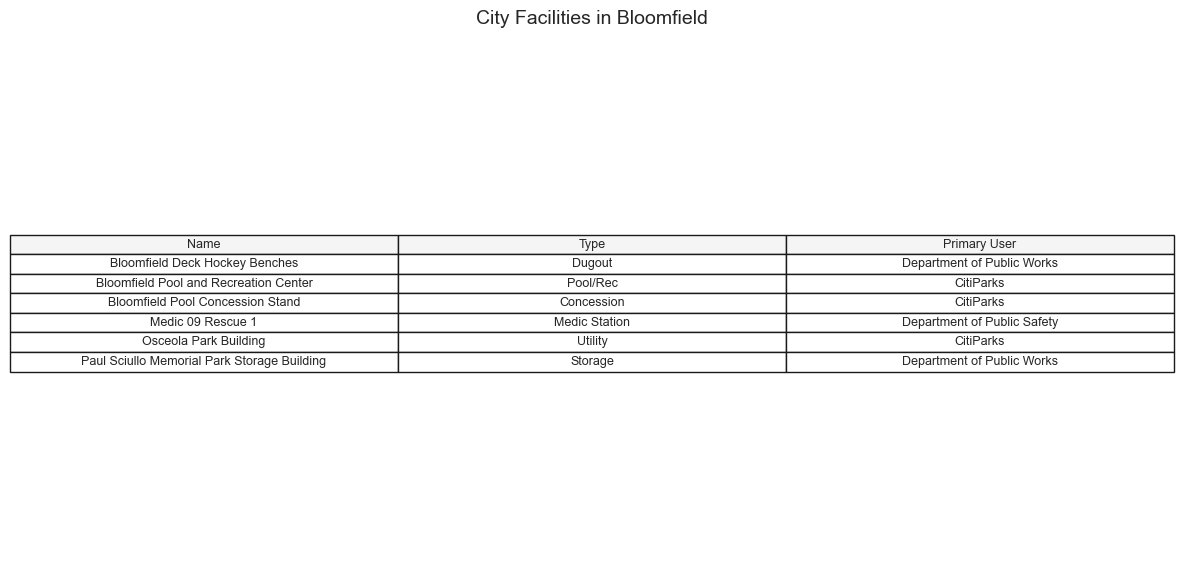

In [69]:

# Filter Bloomfield facilities and select relevant columns
f = data[data['neighborhood'] == 'Bloomfield'][['name', 'type', 'primary_user']]

# Rename columns
f.columns = ['Name', 'Type', 'Primary User']

# Display the table
plt.figure(figsize=(12, 6))

# Hide axes
plt.axis('off')

# Create table
plt.table(cellText=f.values,  # Data for the table
          colLabels=f.columns,  # Column names
          cellLoc='center',  # Center text in each cell
          loc='center',  # Position the table in the center
          colColours=['#f5f5f5']*len(f.columns))  # Color for column headers

# Add title
plt.title('City Facilities in Bloomfield', fontsize=14)

# Show the table
plt.tight_layout()
plt.show()





## Analysis:
In this table, we can see the 6 listed neighborhoods in Bloomfield. These include the Bloomfield Deck Hockey rink, The Pool and Recreation center, A pair of playgrounds and parks at Osceola and the Paul Sciullo II Memorial Park, and a Medic and Rescue unit. Although there are neighborhoods with more facilities, Bloomfield offers a well balanced variety of faciltiies for its residents, both including utility facilities such as the Medic Station and recreational faciltiies such as the pool and rec center. 

Although it does not have the most amount of faciltiies of any Neighborhood in Pittsburgh, it still rises above the average mean and median, with it having 6 facilities to the median of 3 and mean of 5.5. Bloomfield's balanced and diverse variety of city facilties help support its community in multiple ways. While other neighborhoods such as Squirrel Hill South and the Strip District may have more faciltiies by number then Bloomfield, Bloomfield makes up for it in other ways such as its Community and Walkability.



## Conclusion:

We looked at a variety of different interpretations of the dataset of City of Pittsburgh facilities, and although some other neighborhoods have a greater number of facilties, I believe that Bloomfield makes up for it in other ways, such as the previously mentioned walkability. Although my data-driven determination may not match my (extremely biased) opinion of the best neighborhood in Pittsburgh, it has everything I could ask for in a neighborhood. Compared to the Neighborhood I live in of Greenfield, Bloomfield is far more interconnected, there are more parks which are easier to access, there are more varied facilities, and I believe that the facilities in Bloomfield better serve its people then those of Greenfield do. And although there are certainly other metrics I would look at when determining the best neighborhood in a city, I would definately consider facilities as an important metric in a personal search.
   